In [1]:
# Initial imports:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
from matplotlib import pyplot as plt

# Data Cleaning
## Investment Management Firm Returns:

In [2]:
# Read-in returns dataframe and set index as "Date":
whale_returns_csv = Path("CSVs/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sort index in ascending order:
whale_returns_df.sort_index(inplace=True)

# Drop nulls:
whale_returns_df.dropna(inplace=True)

# Preview dataframe:
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns:

In [3]:
# Read Algorithmic returns and set index as "Date"
algo_returns_csv = Path("CSVs/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sort index in ascending order:
algo_returns_df.sort_index(inplace=True)

# Drop nulls:
algo_returns_df.dropna(inplace=True)

# Preview DataFrame:
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns:

In [4]:
# Read S&P500 returns and set index as "Date"
sp500_history_csv = Path("CSVs/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sort index in ascending order:
sp500_history_df.sort_index(inplace=True)

# Preview DataFrame:
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [5]:
# Returns have "$" in front of number.  Check data type of column:
sp500_history_df.dtypes

Close    object
dtype: object

In [6]:
# Remove "$" from values in "Close" column and convert data type from "object" to "float":
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "").astype("float")

# Confirm data type conversion:
sp500_history_df.dtypes

Close    float64
dtype: object

In [7]:
# Calculate S&P 500 daily returns using .pct_change() function:
sp500_daily_returns = sp500_history_df.pct_change()

# Rename column:
sp500_daily_returns.columns = ["S&P 500 Daily Returns"]

# Drop nulls:
sp500_daily_returns.dropna(inplace=True)

# Preview DataFrame
sp500_daily_returns.head()

,S&P 500 Daily Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [8]:
# Concatenate all dataframes into a single dataframe:
daily_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis='columns', join='inner')
daily_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

## Performance

### Daily returns, cumulative returns:

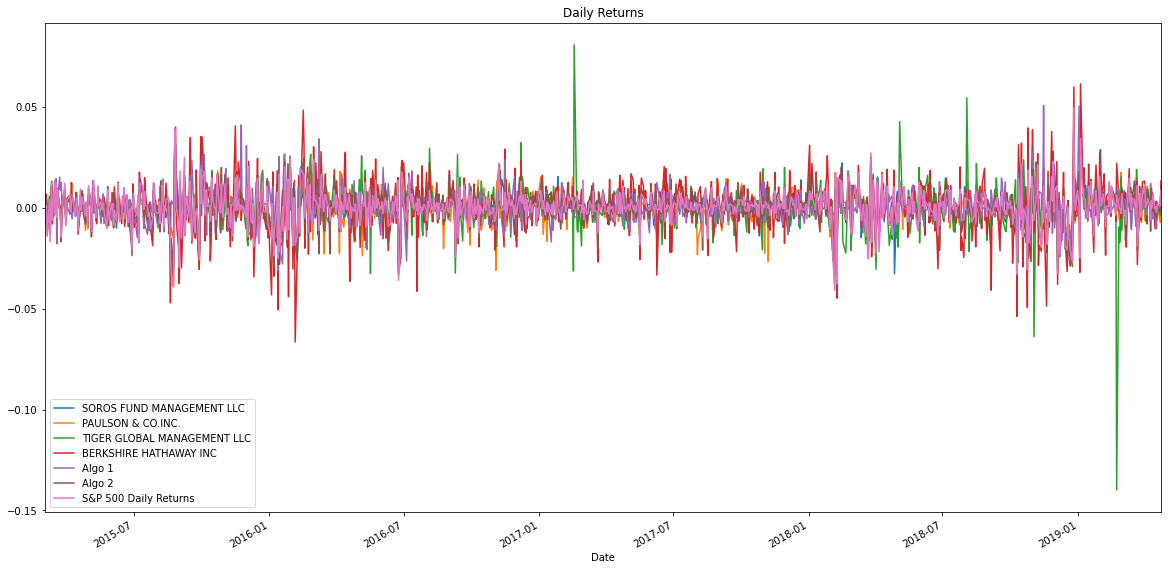

In [9]:
# Plot Daily Returns:
daily_returns_df.plot(figsize=(20,10), title="Daily Returns")
plt.margins(x=0)

#### Based on the above graph, on a day-to-day basis, the S&P 500 at-large is less volatile than any of the individual portfolios, which makes sense.  Tiger Global Management is the most volatile portfolio, with swings much larger than any other; it may significantly outperform the S&P 500 at times, but at other times, it significantly underperforms the S&P 500.  Berkshire Hathaway also appears to display some volatility, at times outperforming the S&P 500, but not to the extent of Tiger Global.

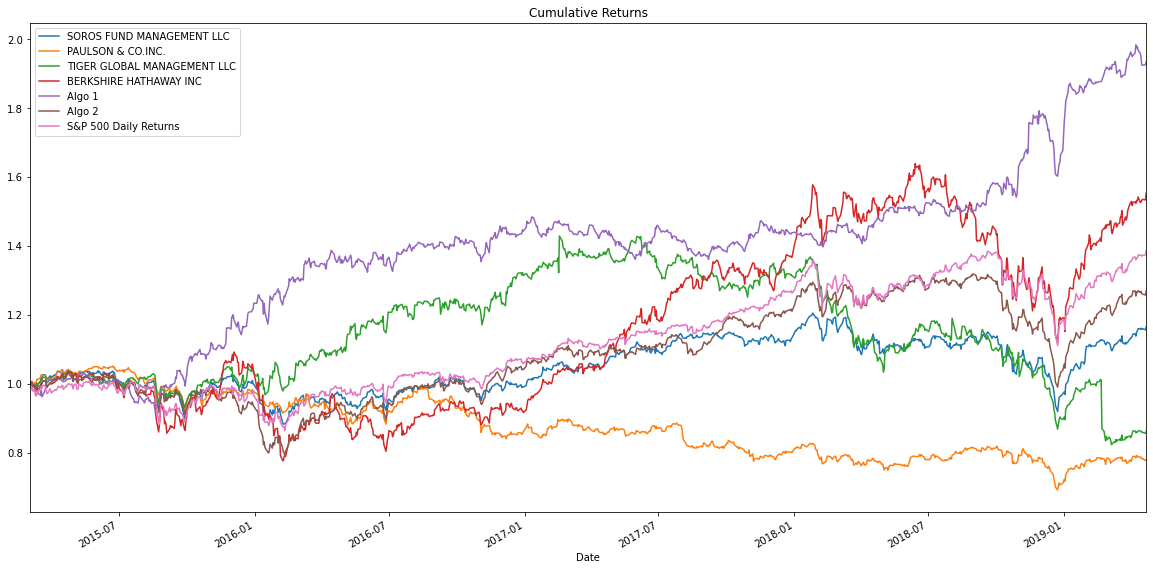

In [10]:
# Plot Cumulative Returns:
cumulative_returns = (1 + daily_returns_df).cumprod()
cumulative_returns.plot(figsize = (20,10), title="Cumulative Returns")
plt.margins(x=0)

#### Based on the above graph, during this 4-year stretch from 2015-2019, Algorithm 1 performed the best and led to the most cumulative returns: it started to separate itself in early 2019.  This is followed by Berkshire Hathaway, and in third, the S&P 500.  Paulson & Co. Inc. had the worst cumulative returns over the 4-year period; in fact, Paulson and Tiger Global Management were the only portfolios to finish in the red.

## Risk

<AxesSubplot:title={'center':'Portfolio Risk'}>

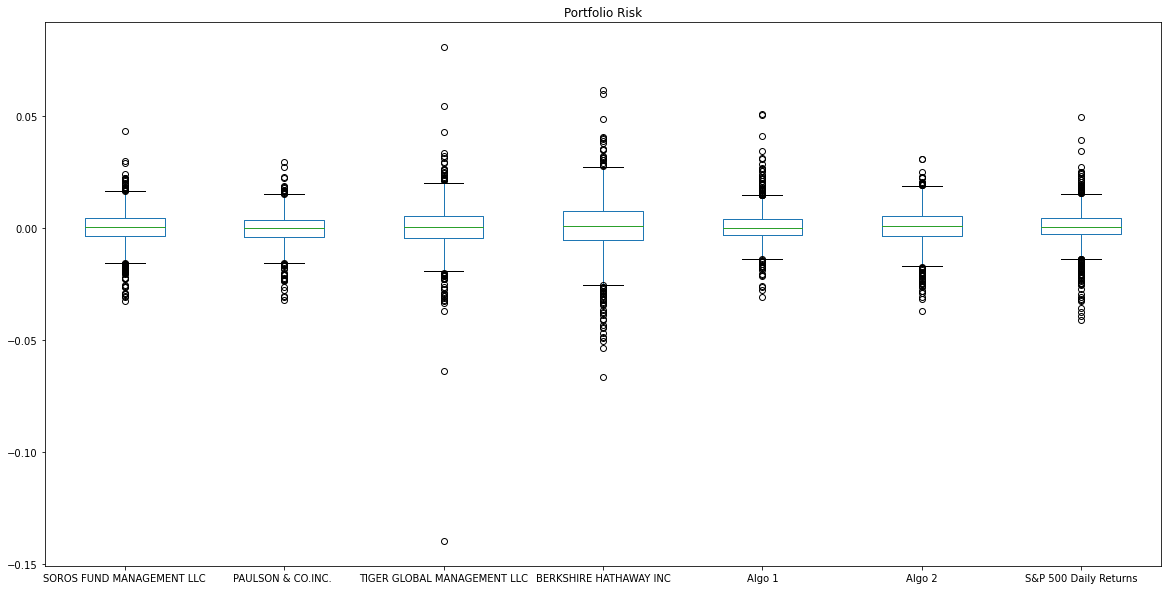

In [11]:
# Box plot to visually show risk:
daily_returns_df.plot(kind = "box", figsize = (20,10), title="Portfolio Risk")

#### The largest spread in the above box plot is for the portfolio of Berkshire Hathaway Inc.  The smallest spread in the above box plot is for the portfolio of Paulson & Co. Inc.  It should be noted that although Tiger Global Management does not have the largest spread, it does have the greatest outliers.

In [12]:
# Calculate the standard deviation for each portfolio:
daily_std_df = pd.DataFrame(daily_returns_df.std()).rename(columns = {0:"Standard Deviation"})
daily_std_df

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500 Daily Returns,0.008554


In [13]:
# Determine which portfolios are riskier than the S&P 500:
higher_std = daily_std_df[daily_std_df["Standard Deviation"] > daily_std_df.loc["S&P 500 Daily Returns", "Standard Deviation"]]
higher_std

,Standard Deviation
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


#### Tiger Global Management LLC and Berkshire Hathaway Inc. have higher standard deviations than, and are therefore riskier than, the S&P 500.

In [14]:
# Calculate the annualized standard deviation (252 trading days):
annualized_std_df = daily_std_df * np.sqrt(252)

# Rename "Standard Deviation" column to "Annualized Standard_Deviation"
annualized_std_df.columns = ["Annualized Standard Deviation"]

# Make new dataframe with sorted data: 
annualized_std_df_sorted = annualized_std_df.sort_values("Annualized Standard Deviation", ascending=False)
annualized_std_df_sorted

,Annualized Standard Deviation
BERKSHIRE HATHAWAY INC,0.205077
TIGER GLOBAL MANAGEMENT LLC,0.172936
S&P 500 Daily Returns,0.135786
Algo 2,0.132430
SOROS FUND MANAGEMENT LLC,0.125335
Algo 1,0.120967
PAULSON & CO.INC.,0.111488


#### Again, we see here that both Tiger Global Management and Berkshire Hathaway have higher annualized standard deviations than S&P 500 returns.

## Rolling Statistics (risk over time)

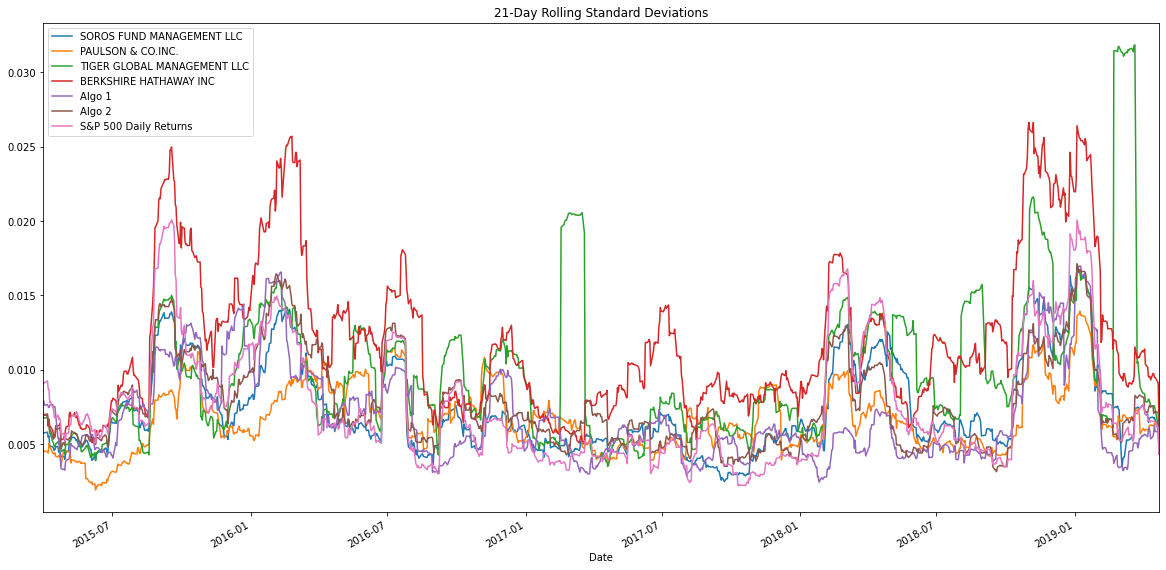

In [15]:
# Calculate and plot the rolling standard deviations for all portfolios using a 21-day trading window:
sp500_rolling_std = daily_returns_df.rolling(window=21).std()
sp500_rolling_std.plot(figsize = (20,10), title="21-Day Rolling Standard Deviations")
plt.margins(x=0)

#### What we see in the above graph is that in general, all portfolios tend to see an increase in risk at the same time risk increases in the S&P 500.  However, the magnitude of these increases vary greatly; for instance, Berkshire Hathaway and Tiger Global Management have a few large spikes in rolling standard deviations, indicating increased risk, while the S&P 500 only sees slight increases in risk during the same timeframe.

In [16]:
# Construct a correlation table:
correlation = daily_returns_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500 Daily Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


#### Based on the above correlation table, Algo 2 most closely resembles the returns of the S&P 500 at an 85.9% correlation, followed closely by Soros Fund Management at 83.8%.  Algo 1 least resembles the returns of the S&P 500, only correlating at 27.9%.

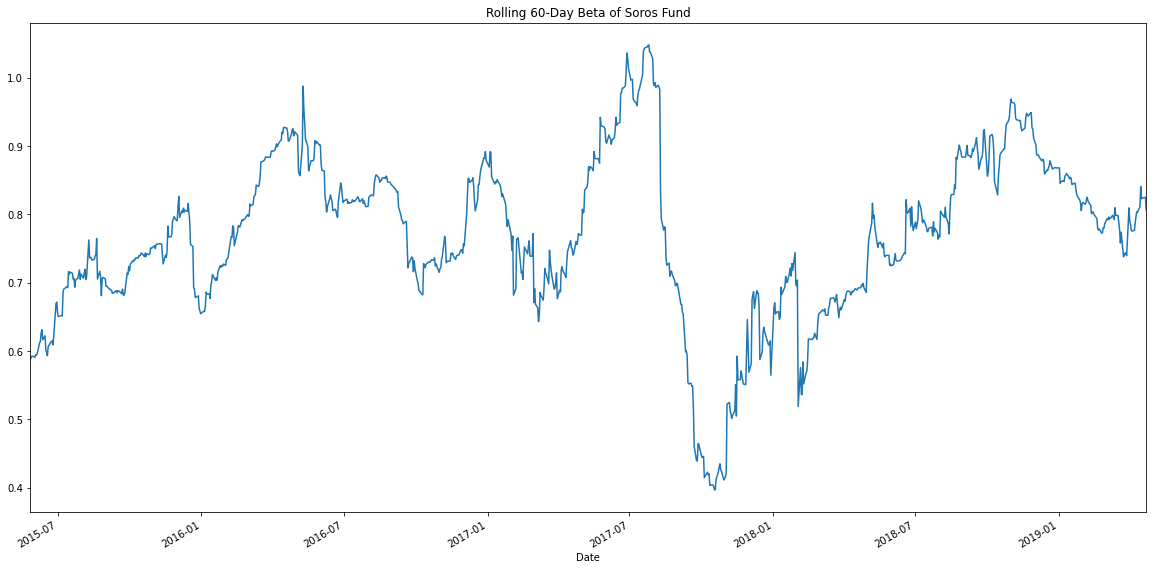

In [17]:
# Calculate Rolling Beta (rolling covariance / rolling variance) for a single portfolio compared to the total market:

# First, calculate rolling covariance:
rolling_covariance = daily_returns_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(daily_returns_df['S&P 500 Daily Returns'])

# Now, calculate rolling variance:
rolling_variance = daily_returns_df['S&P 500 Daily Returns'].rolling(window=60).var()

# Finally, calculate and plot rolling beta:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Soros Fund')
plt.margins(x=0)

#### The above Rolling Beta plot of the Soros Fund tells us about the volatility of the portfolio.  A beta of 1 indicates that the security's price tends to move with the market; a beta greater than 1 indicates that the security's price tends to be more volatile than the market; a beta of less than 1 means it tends to be less volatile than the market.  We see that in general, the Soros Fund tends to be less volatile than the overall market, staying at a rolling beta of less than 1 for the  vast majority of the 4-year period (rolling beta goes above 1 for a short time in early 2017).  This indicates that the portfolio is *not* in fact sensitive to movements in the S&P 500.  This is in line with the calculations we saw above, in which the Soros Fund was on the low-end of standard deviation scores.

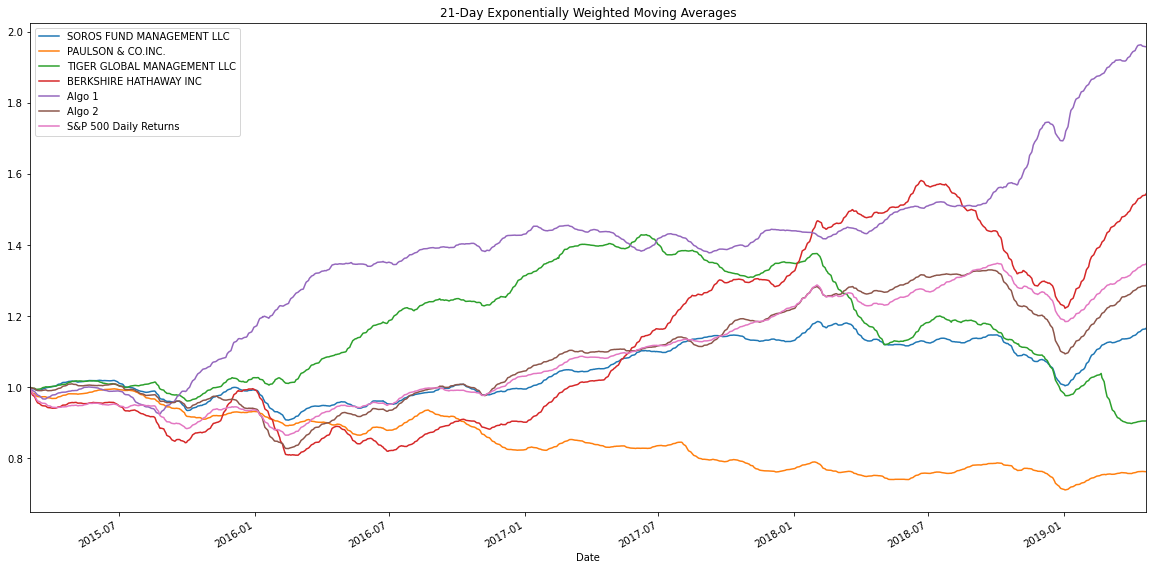

In [18]:
# Calculate and plot a rolling window using the exponentially weighted moving average:
rolling_ewm = daily_returns_df.ewm(span = 21, adjust = False).mean()
(1 + rolling_ewm).cumprod().plot(figsize = (20,10), title="21-Day Exponentially Weighted Moving Averages")
plt.margins(x=0)

#### When plotting the exponentially-weighted moving average with a 21 day half-life, we see that Algo 1 tends to react more significantly to recent price changes than does any other portfolio.

---

## Sharpe Ratios

### Taking return-to-risk into account:

In [19]:
# Calculate annualized Sharpe Ratios:
annualized_sharpe_ratios = daily_returns_df.mean()*252 / (daily_returns_df.std()*np.sqrt(252))

# Sort Sharpe Ratios:
annualized_sharpe_ratios_sorted = annualized_sharpe_ratios.sort_values(ascending=False)
annualized_sharpe_ratios_sorted

Algo 1                         1.378648
S&P 500 Daily Returns          0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

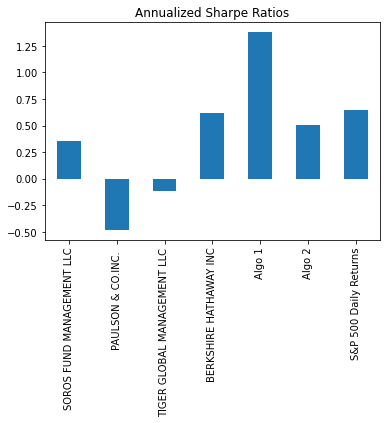

In [20]:
# Visualize the sharpe ratios as a bar plot:
annualized_sharpe_ratios.plot(kind = "bar", title = "Annualized Sharpe Ratios")

#### On the basis of Sharpe Ratios, Algo 1 outperformed both the market as a whole as well as the Investment Mangement Firm portfolios.  Algo 2, however, underperformed the market as a whole, as well as Berkshire Hathaway.  Both Algo 1 and Algo 2 outperformed Soros Fund Managment, Paulson & Co. and Tiger Global Management.

# Build Custom Portfolio of Stocks, Evaluate, and Compare:
### Closing Prices obtained from Google Finance function within Google Sheets and comprised of 1-year's worth of data (5/2018 to 5/2019)
#### I chose 3 stocks to analyze: Apple (AAPL), Google/Alphabet (GOOG) and Costco (COST).

In [21]:
# Read the first stock:
apple_returns_csv = Path("CSVs/aapl_historical.csv")
apple_df = pd.read_csv(apple_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

# Drop "Symbol" column:
apple_df = apple_df.drop('Symbol', axis=1)

# Rename column to identify "AAPL Close":
apple_df.columns = ["AAPL Close"]

# Read the second stock:
google_returns_csv = Path("CSVs/goog_historical.csv")
google_df = pd.read_csv(google_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

# Drop "Symbol" column:
google_df = google_df.drop('Symbol', axis=1)

# Rename column to identify "GOOG Close":
google_df.columns = ["GOOG Close"]

# Read the third stock:
costco_returns_csv = Path("CSVs/cost_historical.csv")
costco_df = pd.read_csv(costco_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

# Drop "Symbol" column:
costco_df = costco_df.drop('Symbol', axis=1)

# Rename column to identify "COST Close":
costco_df.columns = ["COST Close"]

# Concatenate all stocks into a single dataframe:
my_stocks_df = pd.concat([apple_df, google_df, costco_df], axis='columns', join='inner')

# Sort new dataframe:
my_stocks_df.sort_index(ascending=True, inplace=True)

# Drop Nulls
my_stocks_df.dropna(inplace=True)

my_stocks_df.head()

,AAPL Close,GOOG Close,COST Close
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [22]:
# Calculate weighted returns for the portfolio, assuming an equal number of shares for each stock:
weights = [1/3, 1/3, 1/3]
my_portfolio_returns = my_stocks_df.pct_change().dot(weights)
my_portfolio_returns.dropna(inplace=True)
my_portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [23]:
# Add Custom Portfolio to the larger dataframe of fund returns:
total_portfolio_returns_df = pd.concat([my_portfolio_returns, daily_returns_df], axis='columns', join='inner')
total_portfolio_returns_df.rename(columns = {0:"AAPL/GOOG/COST"}, inplace = True)

# Drop nulls:
total_portfolio_returns_df.dropna(inplace=True)
total_portfolio_returns_df.head()

,AAPL/GOOG/COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


## Re-run Portfolio Analysis with my custom portfolio to see how it compares to the others

In [24]:
# Risk:
total_portfolio_std = pd.DataFrame(total_portfolio_returns_df.std()).rename(columns = {0:"Standard Deviation"})
total_portfolio_std = total_portfolio_std.sort_values(by='Standard Deviation', ascending=False)
total_portfolio_std

,Standard Deviation
BERKSHIRE HATHAWAY INC,0.015569
TIGER GLOBAL MANAGEMENT LLC,0.014648
AAPL/GOOG/COST,0.013323
S&P 500 Daily Returns,0.009578
SOROS FUND MANAGEMENT LLC,0.009240
Algo 2,0.008791
Algo 1,0.008423
PAULSON & CO.INC.,0.007353


#### As we saw the first time we ran the Standard Deviation table, Tiger Global Management LLC and Berkshire Hathaway Inc. have higher standard deviations than, and are therefore riskier than, the S&P 500.  This table also includes my custom portfolio, however, and we see here that my custom portfolio of AAPL/GOOG/COST likewise has a higher standard deviation than, and is therefore riskier than, the S&P 500.  This makes sense, as a portfolio of 3 stocks compared to a portfolio of 500 has much less diversification and therefore is much riskier.

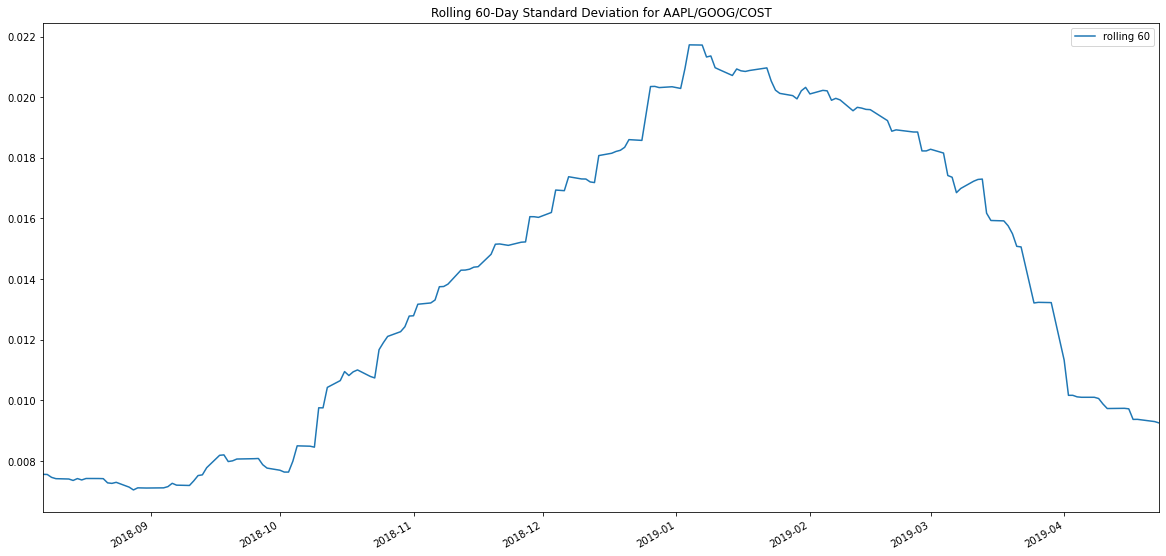

In [25]:
# Plot Rolling 60-day standard deviation for custom portfolio:
my_portfolio_rolling = total_portfolio_returns_df[["AAPL/GOOG/COST"]].rolling(window = 60).std()
ax = my_portfolio_rolling.plot(figsize = (20,10), title = 'Rolling 60-Day Standard Deviation for AAPL/GOOG/COST')
ax.legend(["rolling 60"]);
plt.margins(x=0)

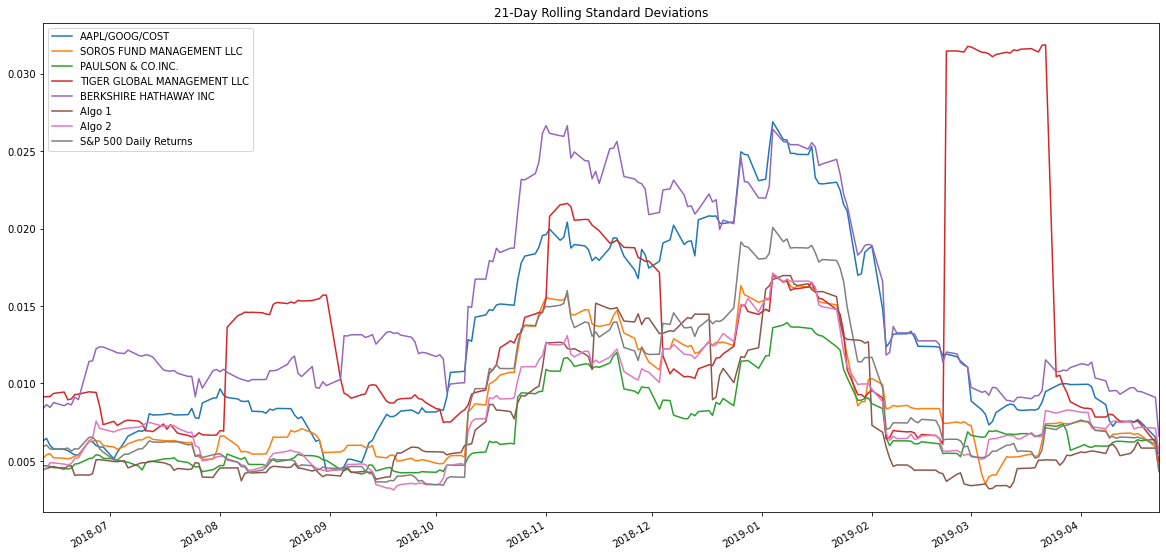

In [26]:
# Plot Rolling 21-day standard deviations for all portfolios:
portfolio_rolling_std = total_portfolio_returns_df.rolling(window=21).std()
portfolio_rolling_std.plot(figsize = (20,10), title="21-Day Rolling Standard Deviations")
plt.margins(x=0)

#### As we saw the first time we ran the 21-Day Rolling Standard Deviation plot, all portfolios tend to see an increase in risk at the same time risk increases in the S&P 500.  However, the magnitude of these increases vary greatly; for instance, Tiger Global Management has a few large spikes in rolling standard deviation, indicating increased risk, while the S&P 500 only sees slight increases in risk during the same timeframe.  My custom portfolio of AAPL/GOOG/COST appears to be on the high end of the scale, certainly always above the rolling standard deviation of the S&P 500.

In [27]:
# Annualized Sharpe Ratios for custom portfolio:
my_portfolio_annualized_sharpe_ratios = total_portfolio_returns_df.mean() * 252 / (total_portfolio_returns_df.std() * np.sqrt(252))

# Sort Sharpe Ratios:
my_portfolio_annualized_sharpe_ratios_sorted = my_portfolio_annualized_sharpe_ratios.sort_values(ascending=False)

# Drop nulls:
my_portfolio_annualized_sharpe_ratios_sorted.dropna(inplace=True)
my_portfolio_annualized_sharpe_ratios_sorted

Algo 1                         2.035665
AAPL/GOOG/COST                 0.933123
S&P 500 Daily Returns          0.584820
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
BERKSHIRE HATHAWAY INC         0.159756
Algo 2                         0.080607
TIGER GLOBAL MANAGEMENT LLC   -1.034216
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

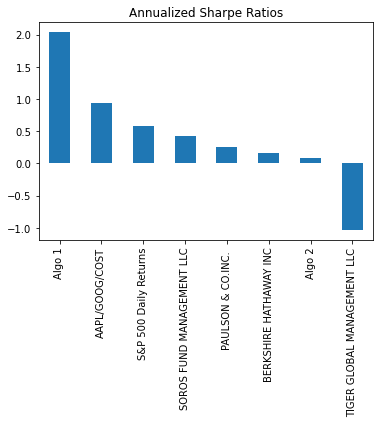

In [28]:
# Visualize the sharpe ratios as a bar plot:
my_portfolio_annualized_sharpe_ratios_sorted.plot(kind = "bar", title = "Annualized Sharpe Ratios")

#### On the basis of Sharpe Ratios, Algo 1 outperformed both the market as a whole as well as the Investment Mangement Firm portfolios.  My custom portfolio of AAPL/GOOG/COST came in 2nd, just in front of the S&P 500.

In [29]:
# Construct a correlation table:
correlation = total_portfolio_returns_df.corr()
correlation

,AAPL/GOOG/COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
AAPL/GOOG/COST,1.000000,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.644210,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.261471,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.739936,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
S&P 500 Daily Returns,0.871875,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


#### Based on the above correlation table, the returns of AAPL/GOOG/COST most closely resemble the returns of the S&P 500 at 87.2% correlation; they least closely resemble the returns of Algo 1 at only 26.1%.

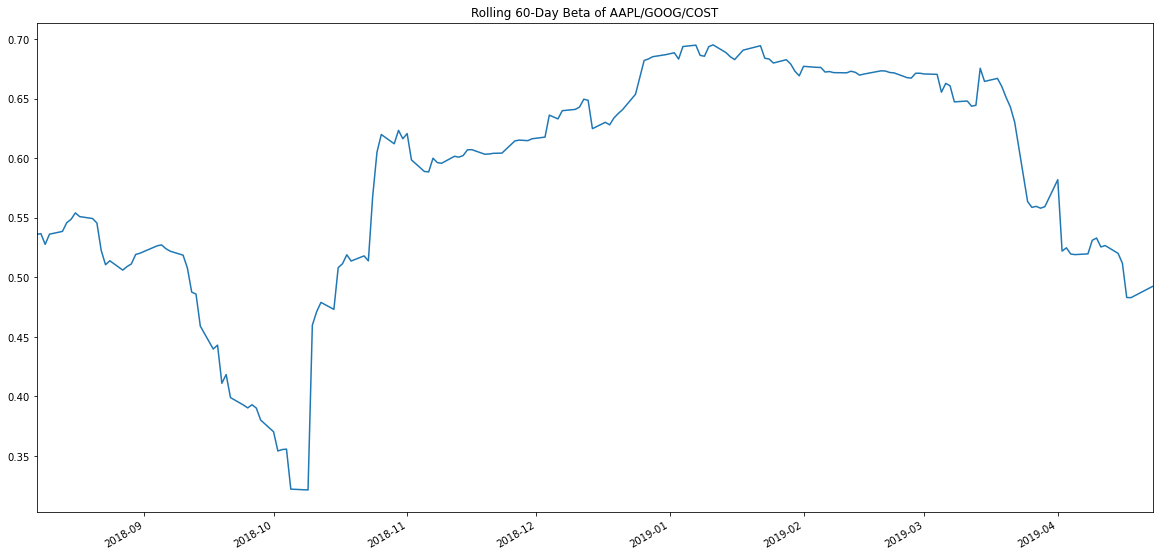

In [30]:
# Rolling Beta:
rolling_covariance = total_portfolio_returns_df['AAPL/GOOG/COST'].rolling(window=60).cov(total_portfolio_returns_df['S&P 500 Daily Returns'])
rolling_variance = total_portfolio_returns_df['AAPL/GOOG/COST'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of AAPL/GOOG/COST')
plt.margins(x=0)

#### The above Rolling Beta plot of my custom portfolio of AAPL/GOOG/COST tells us about the volatility of the portfolio.  A beta of 1 indicates that the security's price tends to move with the market; a beta greater than 1 indicates that the security's price tends to be more volatile than the market; a beta of less than 1 means it tends to be less volatile than the market.  We see that for the entir 1-year timeframe, the portfolio is less volatile than the overall market, staying at a rolling beta of less than 1.  This indicates that the portfolio is *not* in fact sensitive to movements in the S&P 500.